In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3

In [2]:
input_file = "/lustre/scratch117/cellgen/team205/rl20/CTCL/object-new/CTCL1-8_skin_atlas_downsample0.1_forMilo.h5ad"
adata = sc.read_h5ad(input_file)

In [3]:
adata.X.shape

(73375, 1726)

In [4]:
#adata = adata.raw.to_adata()
#adata.X.shape

In [5]:
adata.obs['Condition'] = "a_Other"
ctcl = adata.obs['integrated_sample_id'] == 'CTCL'
adata.obs.loc[ctcl, 'Condition'] = 'CTCL'

In [6]:
adata.obs['Condition']

CTTGGCTGTAGGCTGA-1-4820STDY7388993-Healthy    a_Other
CTTAACTAGTTAGGTA-1-SKN8090579-Psoriasis       a_Other
ACACCGGCAAGTTAAG-11-CTCL                         CTCL
CACTCCACAGTTTACG-1-4820STDY7389013-Healthy    a_Other
GCATACACAAACGCGA-1-32-CTCL                       CTCL
                                               ...   
TAGTGGTCATCCGGGT-1-4820STDY7389005-Healthy    a_Other
CGGAGCTCAAGTTCTG-1-4820STDY7388995-Healthy    a_Other
CAGAGAGGTGGTCTCG-1-SKN8105198-Healthy         a_Other
GTCGGGTAGAGTCTGG-10-CTCL                         CTCL
GGACAAGTCGTCACGG-1-30-CTCL                       CTCL
Name: Condition, Length: 73375, dtype: object

In [7]:
import anndata2ri
import rpy2.rinterface_lib.callbacks
import logging

In [8]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

In [9]:
anndata2ri.activate()

In [10]:
%load_ext rpy2.ipython

In [11]:
%%R
library(miloR)
library(igraph)

In [12]:
adata_no_knn = adata.copy()
adata_no_knn.obsp = None
adata_no_knn.uns.pop("neighbors")

OverloadedDict, wrapping:
	{'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'method': 'umap', 'metric': 'euclidean', 'n_neighbors': 15, 'n_pcs': 50, 'random_state': 1234}, 'rp_forest': {'children': {'data': array([[     1,  88820],
       [     2,  48379],
       [     3,   4536],
       ...,
       [-89140,     -1],
       [-89141,     -1],
       [-89142,     -1]]), 'start': array([      0,  178089,  356128,  534511,  712642,  890833, 1069490,
       1248171, 1426504, 1604749, 1782966, 1960653, 2139108, 2316931,
       2495340, 2672907, 2850802, 3028643, 3207354, 3385079, 3562948,
       3741257, 3919276, 4097501, 4276190, 4454113, 4632086, 4810421,
       4988248, 5166063, 5344204, 5522161, 5700192, 5877871, 6055678,
       6234117, 6411956, 6589567, 6767544, 6945995, 7123760, 7301613,
       7479444, 7657679, 7835458, 8014005, 8192178, 8370249])}, 'hyperplanes': {'data': array([[  0.9396486 ,   0.59028435,   1.6043284 , ...,  -0.05211401,
         -

In [13]:
%%R -i adata_no_knn
adata_no_knn

class: SingleCellExperiment 
dim: 1726 73375 
metadata(13): LR_pre_post_colors LR_pre_pre_colors ...
  rank_genes_groups umap
assays(1): X
rownames(1726): HES4 ISG15 ... AC233755.2 AC233755.1
rowData names(585): gene_ids.SKN8090524.AD feature_types.SKN8090524.AD
  ... mean std
colnames(73375): CTTGGCTGTAGGCTGA-1-4820STDY7388993-Healthy
  CTTAACTAGTTAGGTA-1-SKN8090579-Psoriasis ... GTCGGGTAGAGTCTGG-10-CTCL
  GGACAAGTCGTCACGG-1-30-CTCL
colData names(28): sample_id mad_prd ... leiden_1.0_c10_0.2 Condition
reducedDimNames(3): PCA X_pca_back UMAP
altExpNames(0):


In [14]:
%%R 
milo <- Milo(adata_no_knn)
milo

class: Milo 
dim: 1726 73375 
metadata(13): LR_pre_post_colors LR_pre_pre_colors ...
  rank_genes_groups umap
assays(1): X
rownames(1726): HES4 ISG15 ... AC233755.2 AC233755.1
rowData names(585): gene_ids.SKN8090524.AD feature_types.SKN8090524.AD
  ... mean std
colnames(73375): CTTGGCTGTAGGCTGA-1-4820STDY7388993-Healthy
  CTTAACTAGTTAGGTA-1-SKN8090579-Psoriasis ... GTCGGGTAGAGTCTGG-10-CTCL
  GGACAAGTCGTCACGG-1-30-CTCL
colData names(28): sample_id mad_prd ... leiden_1.0_c10_0.2 Condition
reducedDimNames(3): PCA X_pca_back UMAP
altExpNames(0):
nhoods dimensions(2): 1 1
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(0):
nhoodIndex names(1): 0
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(0):
nhoodAdjacency dimension(2): 1 1


In [15]:
%%R 
milo <- buildGraph(milo, k=20, d=30)

In [16]:
adata_no_knn.obs.donor_id

CTTGGCTGTAGGCTGA-1-4820STDY7388993-Healthy       S1
CTTAACTAGTTAGGTA-1-SKN8090579-Psoriasis          P1
ACACCGGCAAGTTAAG-11-CTCL                      CTCL3
CACTCCACAGTTTACG-1-4820STDY7389013-Healthy       S3
GCATACACAAACGCGA-1-32-CTCL                    CTCL7
                                              ...  
TAGTGGTCATCCGGGT-1-4820STDY7389005-Healthy       S2
CGGAGCTCAAGTTCTG-1-4820STDY7388995-Healthy       S1
CAGAGAGGTGGTCTCG-1-SKN8105198-Healthy            S5
GTCGGGTAGAGTCTGG-10-CTCL                      CTCL3
GGACAAGTCGTCACGG-1-30-CTCL                    CTCL7
Name: donor_id, Length: 73375, dtype: category
Categories (20, object): ['CTCL1', 'CTCL2', 'CTCL3', 'CTCL4', ..., 'S2', 'S3', 'S4', 'S5']

In [17]:
design_df = adata_no_knn.obs[["donor_id", "Condition"]]
design_df.drop_duplicates(inplace=True)
design_df.index = design_df['donor_id']
design_df

/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,donor_id,Condition
donor_id,,
S1,S1,a_Other
P1,P1,a_Other
CTCL3,CTCL3,CTCL
S3,S3,a_Other
CTCL7,CTCL7,CTCL
P3,P3,a_Other
S5,S5,a_Other
P2,P2,a_Other
CTCL8,CTCL8,CTCL


In [18]:
#%%R
#saveRDS(milo, file="/lustre/scratch117/cellgen/team205/rl20/CTCL/object/CTCL_milo_multivariable.rds")

In [19]:
#%%R
#mm <- readRDS("/lustre/scratch117/cellgen/team205/rl20/CTCL/object/CTCL_milo_multivariable.rds")

In [20]:
#%%R
#write.csv(design_df, file="/lustre/scratch117/cellgen/team205/rl20/CTCL/object/CTCL_milo_multivariable_design.csv",quote=F)

In [21]:
%%R -i design_df -o DA_results
## Define neighbourhoods
milo <- makeNhoods(milo, prop = 0.05, k = 20, d=30, refined = TRUE)

## Count cells in neighbourhoods
milo <- countCells(milo, meta.data = data.frame(colData(milo)), sample="donor_id")

## Calculate distances between cells in neighbourhoods
## for spatial FDR correction
milo <- calcNhoodDistance(milo, d=30)

## Test for differential abundance
DA_results <-  testNhoods(milo, design = ~ Condition,
                         design.df = design_df)

In [22]:
DA_results

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
1,-0.000754,9.441274,4.696139e-07,0.999453,0.999453,1.0,0.999453
2,1.566204,9.005775,3.539168e+00,0.059940,0.193525,2.0,0.182265
3,-0.122971,9.308161,2.222844e-02,0.881482,0.933788,3.0,0.932834
4,1.905222,8.911924,4.740502e+00,0.029464,0.128378,4.0,0.120881
5,-0.174326,9.243678,4.398516e-02,0.833882,0.907707,5.0,0.905247
...,...,...,...,...,...,...,...
3242,-1.065122,9.169721,1.508748e+00,0.219335,0.405715,3242.0,0.390486
3243,1.541073,9.098466,3.413731e+00,0.064661,0.201044,3243.0,0.189797
3244,0.101369,9.039792,1.366748e-02,0.906933,0.948729,3244.0,0.948766
3245,-1.271304,8.977349,1.955741e+00,0.161975,0.340394,3245.0,0.324845


Text(0, 0.5, '- log10(Spatial FDR)')

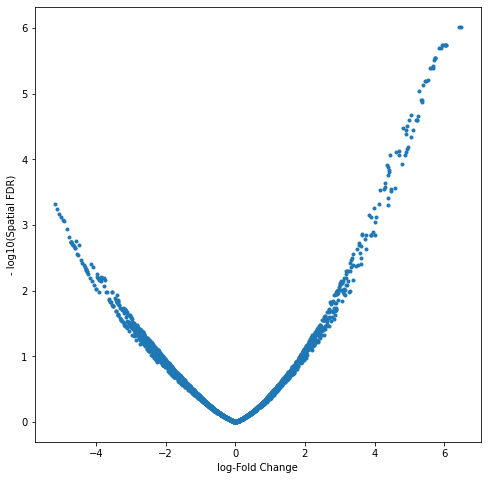

In [23]:
plt.plot(DA_results.logFC, -np.log10(DA_results.SpatialFDR), '.');
plt.xlabel("log-Fold Change");
plt.ylabel("- log10(Spatial FDR)")

In [24]:
%%R
milo <- buildNhoodGraph(milo)

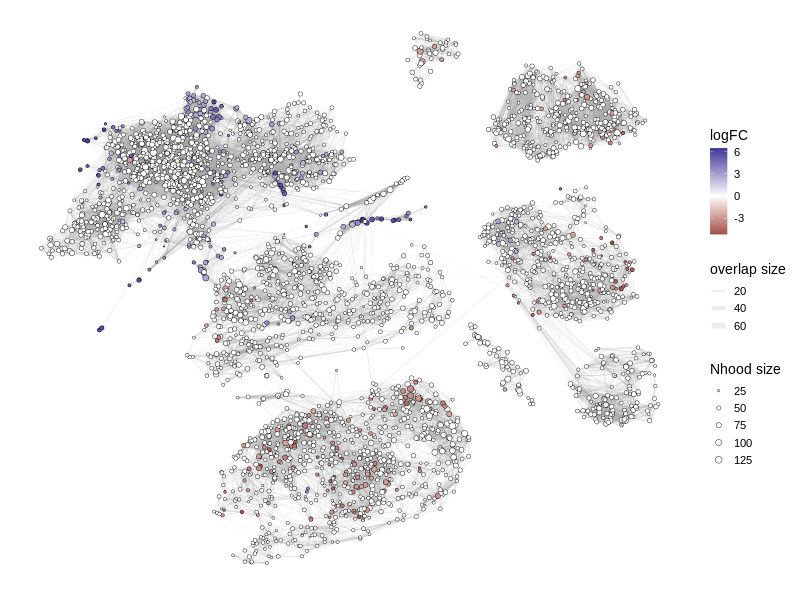

In [25]:
%%R -w 800 -h 600
plotNhoodGraphDA(milo, DA_results, alpha=0.05)

In [26]:
%%R
DA_results <- annotateNhoods(milo, DA_results, coldata_col = "broad_cell_type") #### combine with pre-defined cell clusters
head(DA_results)

          logFC   logCPM            F      PValue        FDR Nhood SpatialFDR
1 -0.0007535224 9.441274 4.696139e-07 0.999453225 0.99945323     1 0.99945323
2  1.5662044477 9.005775 3.539168e+00 0.059940487 0.19352533     2 0.18226527
3 -0.1229713749 9.308161 2.222844e-02 0.881481503 0.93378800     3 0.93283432
4  1.9052222967 8.911924 4.740502e+00 0.029464458 0.12837803     4 0.12088122
5 -0.1743256044 9.243678 4.398516e-02 0.833881957 0.90770652     5 0.90524663
6 -2.5431214900 9.505743 7.121019e+00 0.007620643 0.05766109     6 0.05367367
  broad_cell_type broad_cell_type_fraction
1          T-cell                1.0000000
2          T-cell                0.9795918
3          T-cell                1.0000000
4           Fibro                1.0000000
5          T-cell                1.0000000
6              KC                1.0000000


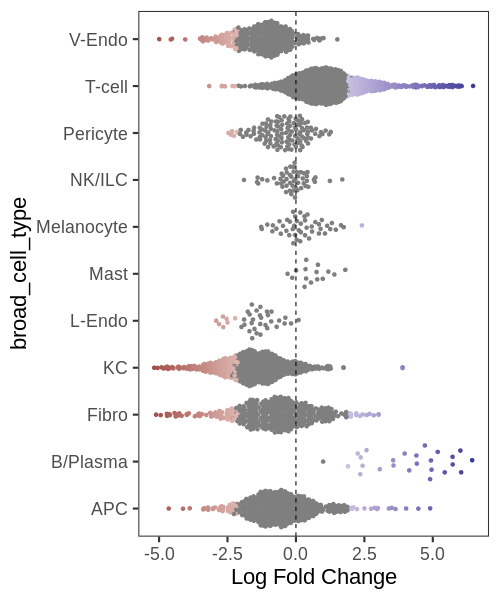

In [28]:
%%R -w 500 -h 600 
library(ggplot2)
plotDAbeeswarm(DA_results, group.by = "broad_cell_type") + 
    theme(legend.position = "none") +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    geom_hline(yintercept=0, linetype=2, color="black")
#ggsave("./figures/milo_overall.pdf")
### "cell_states" represents pre-defined/pre-annotated cell clusters